In [1]:
# Импортируем библиотеки, которые будем использовать в рамках работы
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import re

In [2]:
# посмотрим на датасет
stock_market = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/stock_market_data.csv", index_col=0)
stock_market.head()

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0  02-02-2024              2.079               NaN            72.28   
1  01-02-2024              2.050          161340.0            73.82   
2  31-01-2024              2.100          142860.0            75.85   
3  30-01-2024              2.077          139750.0            77.82   
4  29-01-2024              2.490            3590.0            76.78   

   Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  Bitcoin_Vol.  \
0             NaN        3.8215          NaN     43,194.70       42650.0   
1        577940.0        3.8535          NaN     43,081.40       47690.0   
2        344490.0        3.9060          NaN     42,580.50       56480.0   
3        347240.0        3.9110          NaN     42,946.20       55130.0   
4        331930.0        3.8790          NaN     43,299.80       45230.0   

  Platinum_Price  ...  Berkshire_Price Berkshire_Vol.  Netflix_Price  \
0          901.6  ...         5,89,498        10580.0         564.64   
1          922.3  ...         5,81,600         9780.0         567.51   
2          932.6  ...         5,78,020         9720.0         564.11   
3          931.7  ...         5,84,680         9750.0         562.85   
4          938.3  ...         5,78,800        13850.0         575.79   

  Netflix_Vol. Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  Gold_Price  \
0    4030000.0       171.81  117220000.0      474.99  84710000.0    2,053.70   
1    3150000.0       159.28   66360000.0      394.78  25140000.0    2,071.10   
2    4830000.0       155.20   49690000.0      390.14  20010000.0    2,067.40   
3    6120000.0       159.00   42290000.0      400.06  18610000.0    2,050.90   
4    6880000.0       161.26   42840000.0      401.02  17790000.0    2,034.90   

   Gold_Vol.  
0        NaN  
1   260920.0  
2   238370.0  
3   214590.0  
4     1780.0  

[5 rows x 38 columns]

Мы видим странну вещь в некоторых столбцах значения вот такие 42,946.20 мы понимаем что это скорее всего число, но в таком формате мы его как число не прочитаем, а где то есть еще большая странность - 5,84,680 - это еще более сложное число, ясно чт омы ложны его преобразовывать

In [3]:
# посмотрим на колонки
stock_market.columns.unique()

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

In [4]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   object 
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   object 
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   object 
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   object 
 14  Nasdaq_100_Price   1243 non-null   object 
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 non-n

И действительно те столбцы где у нас неправильная запятая определяются как объект, а не число

# Задание 1 (2 балла)
Посмотрите на тип данных столбца с датами. Преобразуйте текущий тип данных в формат pandas.Timestamp. С помощью функционала библиотеки Pandas создайте линейные графики динамики стоимости Bitcoin и Ethereum с января 2019 года по декабрь 2021 года.

In [5]:
type(stock_market['Date'][0])

str

In [6]:
# Преобразование столбца 'Date' в формат pandas.Timestamp
stock_market['Date'] = pd.to_datetime(stock_market['Date'], format='%d-%m-%Y')


In [7]:
type(stock_market['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# А теперь займемся данными
def convert_to_float(value):
    # Удаляем первую запятую, если она есть
    if ',' in value:
        value = value.replace(',', '', 1)
    # Если осталась ещё одна запятая, заменяем её на точку
    if ',' in value:
        value = value.replace(',', '.')
    # Преобразуем строку в число с плавающей точкой и возвращаем результат
    return float(value)

In [9]:
# Применяем функцию convert_to_float ко всем столбцам, кроме 'Date'
for column in stock_market.columns:
    if column != 'Date' and stock_market[column].dtype != 'float64':  # Проверяем тип данных столбца
        stock_market[column] = stock_market[column].apply(convert_to_float)

# Выведем первые строки для проверки
stock_market.head()

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0 2024-02-02              2.079               NaN            72.28   
1 2024-02-01              2.050          161340.0            73.82   
2 2024-01-31              2.100          142860.0            75.85   
3 2024-01-30              2.077          139750.0            77.82   
4 2024-01-29              2.490            3590.0            76.78   

   Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0             NaN        3.8215          NaN        43194.7       42650.0   
1        577940.0        3.8535          NaN        43081.4       47690.0   
2        344490.0        3.9060          NaN        42580.5       56480.0   
3        347240.0        3.9110          NaN        42946.2       55130.0   
4        331930.0        3.8790          NaN        43299.8       45230.0   

   Platinum_Price  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0           901.6  ...          589.498         10580.0         564.64   
1           922.3  ...          581.600          9780.0         567.51   
2           932.6  ...          578.020          9720.0         564.11   
3           931.7  ...          584.680          9750.0         562.85   
4           938.3  ...          578.800         13850.0         575.79   

   Netflix_Vol.  Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  \
0     4030000.0        171.81  117220000.0      474.99  84710000.0   
1     3150000.0        159.28   66360000.0      394.78  25140000.0   
2     4830000.0        155.20   49690000.0      390.14  20010000.0   
3     6120000.0        159.00   42290000.0      400.06  18610000.0   
4     6880000.0        161.26   42840000.0      401.02  17790000.0   

   Gold_Price  Gold_Vol.  
0      2053.7        NaN  
1      2071.1   260920.0  
2      2067.4   238370.0  
3      2050.9   214590.0  
4      2034.9     1780.0  

[5 rows x 38 columns]

In [10]:
# Проверим типов данных после преобразования
print(stock_market.dtypes)

Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.            float64
Crude_oil_Price             float64
Crude_oil_Vol.              float64
Copper_Price                float64
Copper_Vol.                 float64
Bitcoin_Price               float64
Bitcoin_Vol.                float64
Platinum_Price              float64
Platinum_Vol.               float64
Ethereum_Price              float64
Ethereum_Vol.               float64
S&P_500_Price               float64
Nasdaq_100_Price            float64
Nasdaq_100_Vol.             float64
Apple_Price                 float64
Apple_Vol.                  float64
Tesla_Price                 float64
Tesla_Vol.                  float64
Microsoft_Price             float64
Microsoft_Vol.              float64
Silver_Price                float64
Silver_Vol.                 float64
Google_Price                float64
Google_Vol.                 float64
Nvidia_Price                float64
Nvidia_Vol.                 

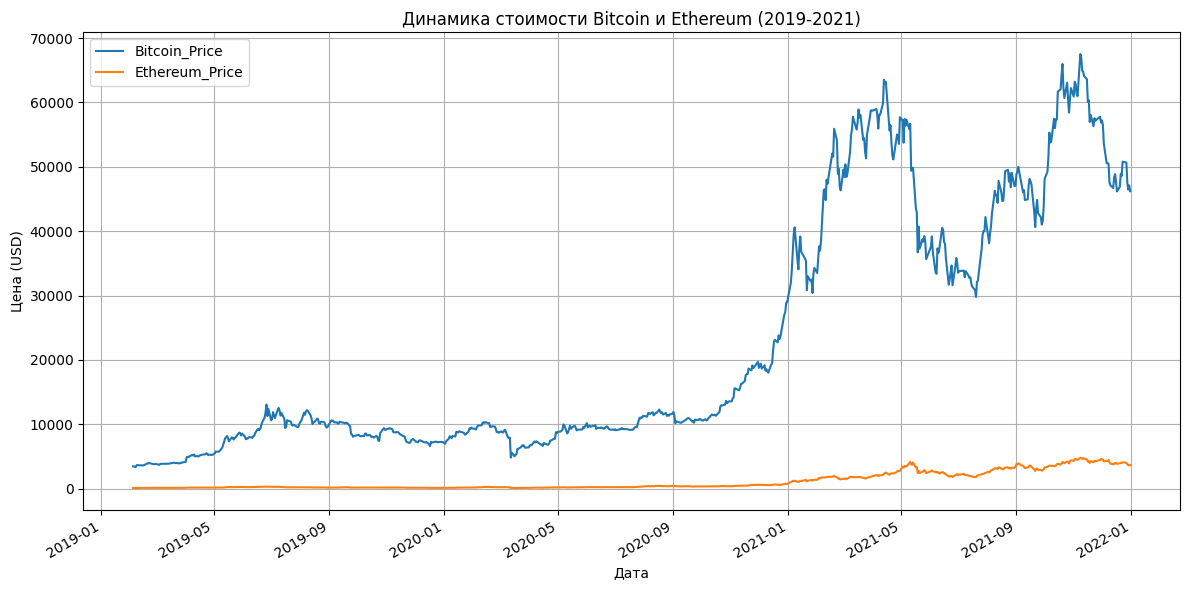

In [11]:
# Фильтрация данных по диапазону дат для Bitcoin и Ethereum
bitcoin_ethereum_data = stock_market.loc[(stock_market['Date'] >= '2019-01-01') & (stock_market['Date'] <= '2021-12-31'), ['Date', 'Bitcoin_Price', 'Ethereum_Price']]

# Установка столбца 'Date' в качестве индекса - так удобнее для pandas
bitcoin_ethereum_data.set_index('Date', inplace=True)

# Построение графика с помощью встроенных инструментов Pandas
bitcoin_ethereum_data.plot(figsize=(12, 6), title='Динамика стоимости Bitcoin и Ethereum (2019-2021)', xlabel='Дата', ylabel='Цена (USD)')

plt.grid(True)
plt.tight_layout()
plt.show()

Мы видим что биткоин и дороже и гораздо активнее колеблется там у себя наверху, но хорошо бы посмотреть на них и в отдельности

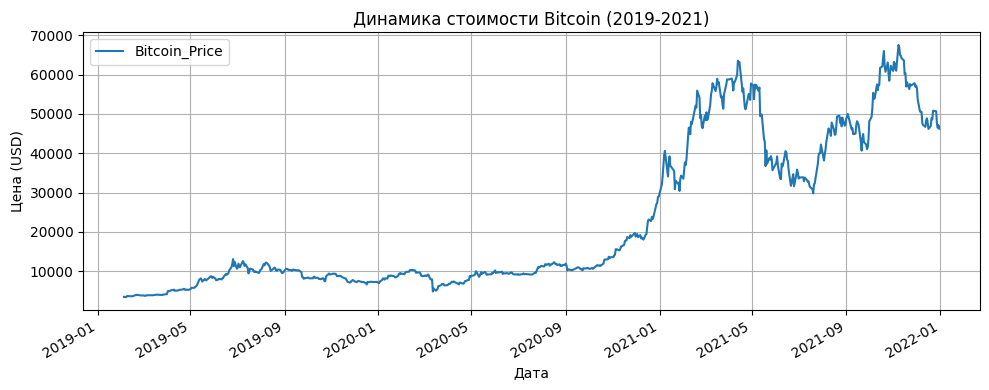

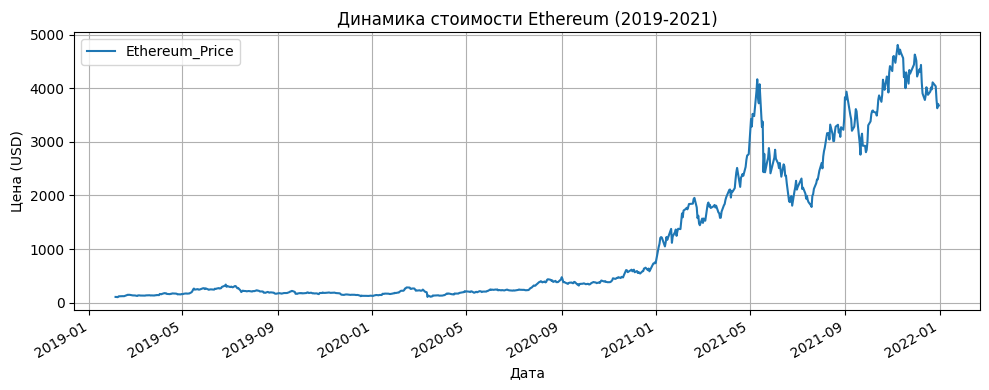

In [12]:
# Создадим отдельные таболички для Bitcoin и Ethereum
bitcoin_data = stock_market.loc[(stock_market['Date'] >= '2019-01-01') & (stock_market['Date'] <= '2021-12-31'), ['Date', 'Bitcoin_Price']]
ethereum_data = stock_market.loc[(stock_market['Date'] >= '2019-01-01') & (stock_market['Date'] <= '2021-12-31'), ['Date', 'Ethereum_Price']]


# Установим столбца 'Date' в качестве индекса
bitcoin_data.set_index('Date', inplace=True)
ethereum_data.set_index('Date', inplace=True)

# строим график Bitcoin
bitcoin_data.plot(figsize=(10, 4), title='Динамика стоимости Bitcoin (2019-2021)', xlabel='Дата', ylabel='Цена (USD)')

plt.grid(True)
plt.tight_layout()

# строим график Ethereum
ethereum_data.plot(figsize=(10, 4), title='Динамика стоимости Ethereum (2019-2021)', xlabel='Дата', ylabel='Цена (USD)')

plt.grid(True)
plt.tight_layout()
plt.show()

# Задание 2 (2 балла)
Создайте один график, на котором будет изображена динамика цен на все полезные ископаемые в 2019–2024 гг. (Natural Gas, Crude Oil, Copper, Platinum, Gold). Цены рассчитайте относительно 4 февраля 2019 года (цены в этот день возьмите за 1, остальные рассчитайте как отношение цены в заданный день к цене 4 февраля 2019 года).

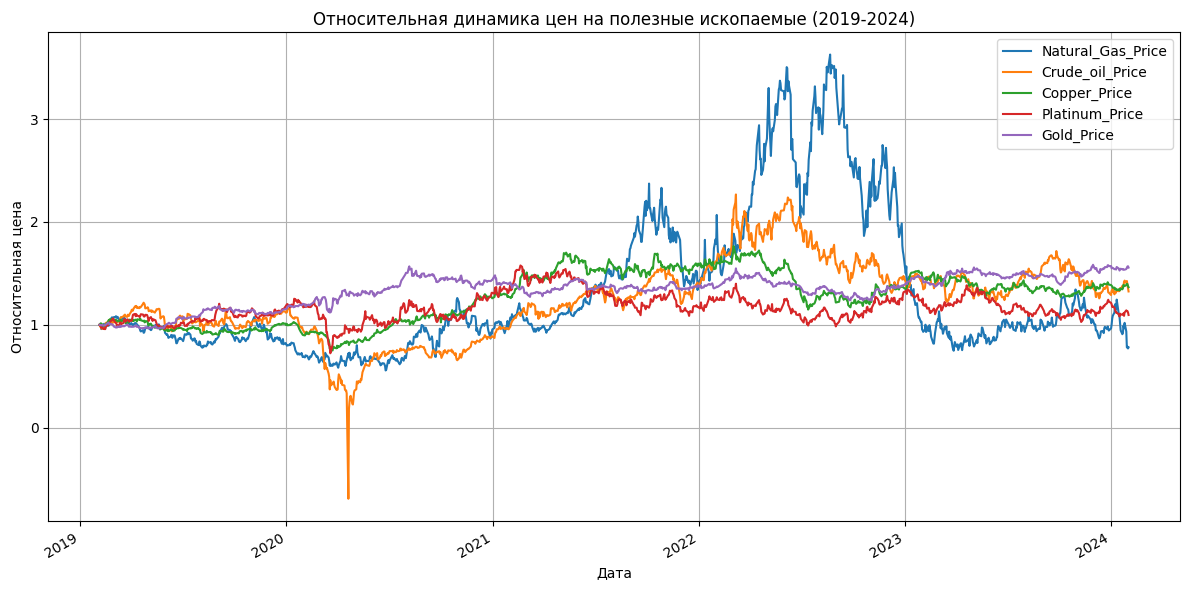

In [13]:
# отфильтруем данные за период с 2019 по 2024 год
mining_commodities_data = stock_market.loc[(stock_market['Date'] >= '2019-01-01') & (stock_market['Date'] <= '2024-12-31')]

# 'Date' в качестве индекса
mining_commodities_data.set_index('Date', inplace=True)

# зададим базовые цены на 4 февраля 2019 года для каждого ресурса
base_prices = mining_commodities_data.loc['2019-02-04', ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']]

# Рассчет отношения цен к базовым ценам
relative_prices = mining_commodities_data[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price']] / base_prices.values

# Построим графика
relative_prices.plot(figsize=(12, 6), title='Относительная динамика цен на полезные ископаемые (2019-2024)', xlabel='Дата', ylabel='Относительная цена')

plt.grid(True)
plt.tight_layout()
plt.show()


Интересно что было с ценами на сырую нефть весной 2020 года? А вот почему подскочили цены на газ в конце 2022 года и сильно росли в 2023 году нетрудно догадаться

# Задание 3 (4 балла)
Среди всех IT-компаний явно выделяются пять наиболее крупных. Они объединены аббревиатурой FAANG — Meta (Former Facebook), Amazon, Apple, Netflix, Google. Многие программисты мечтают попасть именно в эти компании, а инвесторы пристально следят за их деятельностью. Давайте узнаем, насколько это оправданно.

## Задание 3.1 (1 балл)
Создайте функцию, которая будет принимать на вход произвольное количество столбцов формата pandas.Series и возвращать сумму этих серий.

Подсказка: используйте инструментарий *args и **kwags.
С помощью метода .apply() создайте новый столбец FAANG, который будет представлять собой сумму стоимости акций всех компаний, входящих в это символическое объединение.

In [14]:
# Функция будет считать сумму значений в сериях
def calculate_sum(*args):
    return sum(args)

# создадим отдельный столбц совокупности компаний FAANG
stock_market['FAANG'] = stock_market[['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']].apply(lambda row: calculate_sum(*row), axis=1)

stock_market.head()


Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0 2024-02-02              2.079               NaN            72.28   
1 2024-02-01              2.050          161340.0            73.82   
2 2024-01-31              2.100          142860.0            75.85   
3 2024-01-30              2.077          139750.0            77.82   
4 2024-01-29              2.490            3590.0            76.78   

   Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0             NaN        3.8215          NaN        43194.7       42650.0   
1        577940.0        3.8535          NaN        43081.4       47690.0   
2        344490.0        3.9060          NaN        42580.5       56480.0   
3        347240.0        3.9110          NaN        42946.2       55130.0   
4        331930.0        3.8790          NaN        43299.8       45230.0   

   Platinum_Price  ...  Berkshire_Vol.  Netflix_Price  Netflix_Vol.  \
0           901.6  ...         10580.0         564.64     4030000.0   
1           922.3  ...          9780.0         567.51     3150000.0   
2           932.6  ...          9720.0         564.11     4830000.0   
3           931.7  ...          9750.0         562.85     6120000.0   
4           938.3  ...         13850.0         575.79     6880000.0   

   Amazon_Price  Amazon_Vol.  Meta_Price   Meta_Vol.  Gold_Price  Gold_Vol.  \
0        171.81  117220000.0      474.99  84710000.0      2053.7        NaN   
1        159.28   66360000.0      394.78  25140000.0      2071.1   260920.0   
2        155.20   49690000.0      390.14  20010000.0      2067.4   238370.0   
3        159.00   42290000.0      400.06  18610000.0      2050.9   214590.0   
4        161.26   42840000.0      401.02  17790000.0      2034.9     1780.0   

     FAANG  
0  1539.67  
1  1449.59  
2  1433.95  
3  1461.41  
4  1483.31  

[5 rows x 39 columns]

## Задание 3.2 (1 балла)
Аналогично заданию 2.1 рассчитайте все стоимости акций компаний относительно стоимости 4 февраля 2019 года (возьмите это значение за единицу, остальные — как соотношение).

Создайте линейный график, на котором будут изображены все графики роста стоимости компаний (входящих в FAANG) относительно 4 февраля 2019 года.
Нанесите на график темпы роста всего FAANG. Те компании, которые росли быстрее (большую часть времени), чем в среднем росли показатели по FAANG, покрасьте в оттенки синего, а те компании, которые росли медленнее, — в оттенки красного.
Добавьте легенду и остальные аттрибуты.

Для начала просто посмотрим как выглядит соотношение

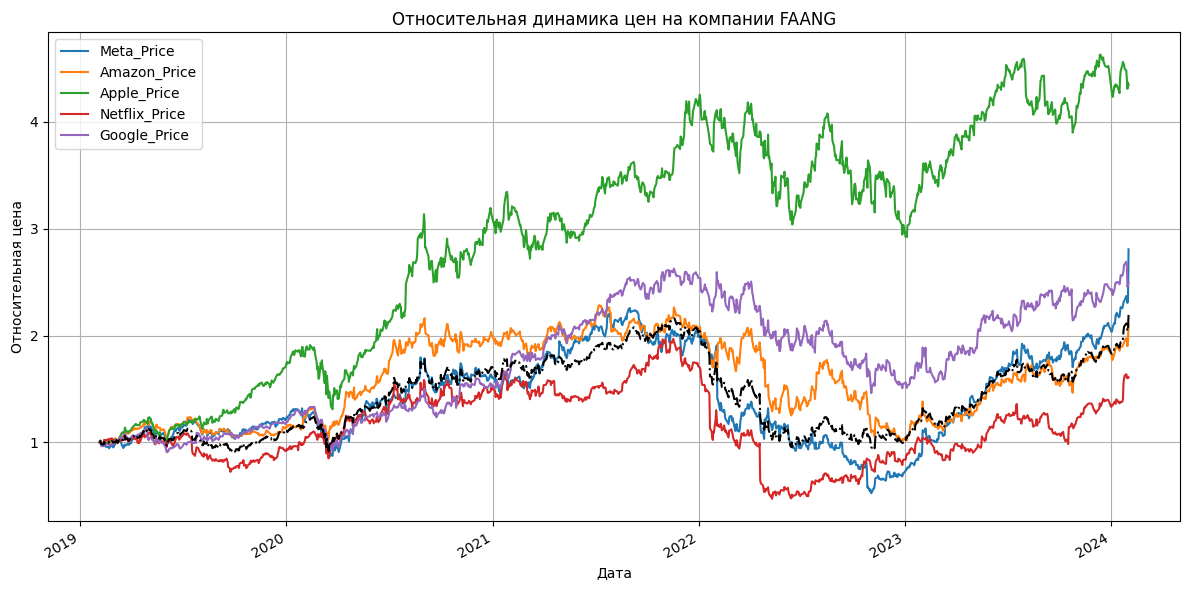

In [15]:
# Выбираем данные за период с 2019 по 2024 год
faang_data = stock_market.loc[(stock_market['Date'] >= '2019-01-01') & (stock_market['Date'] <= '2024-12-31')]

# Установка столбца 'Date' в качестве индекса
faang_data.set_index('Date', inplace=True)

# Определим цены на 4 февраля 2019 года для каждой компании
base_prices = faang_data.loc['2019-02-04', ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']]

faang_base = faang_data.loc['2019-02-04', ['FAANG']]

# Рассчитаем отношения цен к базовым ценам
relative_prices = faang_data[['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']] / base_prices.values
relative_prices_faang = faang_data['FAANG'] / faang_base.values

# график
relative_prices.plot(figsize=(12, 6), title='Относительная динамика цен на компании FAANG', xlabel='Дата', ylabel='Относительная цена')
# Добавим линии 'FAANG' пунктиром и черного цвета
plt.plot(relative_prices_faang.index, relative_prices_faang.values, linestyle='-.', color='black')

plt.grid(True)
plt.tight_layout()
plt.show()


Теперь перрейдем  заданию и воспользуемся уже mathplotlib и seaborn. Но есть вопрос как рассчитать компании, которые росли быстрее (большую часть времени), чем в среднем росли показатели по FAANG? у меня возникло сразу три варианта

Первый вариант - сравнить по каждой дате значение компании и FAANG так мы получим в скольких точках значения у компании были больше и если их больше половины длины списка - то красим линию синим

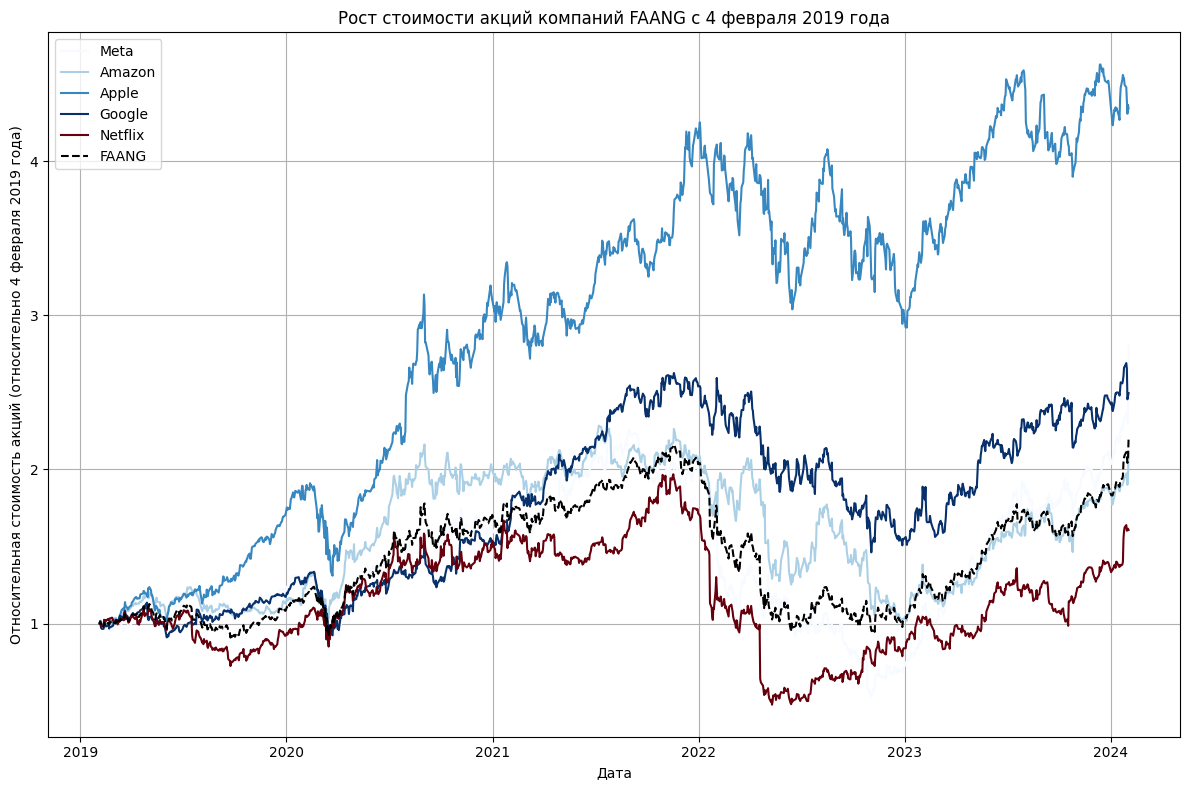

In [16]:
# определим столбец с датой это будет ось x
date_column = 'Date'

# Список компаний FAANG
faang_companies = ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']

# Определение базовых цен для каждой компании FAANG (4 февраля 2019 года)
base_prices_faang = stock_market.loc[stock_market[date_column] == '2019-02-04', faang_companies].iloc[0]

# Определение базовой цены для FAANG (4 февраля 2019 года)
base_price_FAANG = stock_market.loc[stock_market[date_column] == '2019-02-04', 'FAANG'].iloc[0]

# Рассчитываем относительные цены для каждой компании FAANG
relative_prices_faang = stock_market[faang_companies] / base_prices_faang

# Рассчитываем относительные цены для FAANG
relative_prices_FAANG = stock_market['FAANG'] / base_price_FAANG

# Списки компаний выше и ниже FAANG
above_faang_companies = []
below_faang_companies = []

# Определяем компании выше и ниже FAANG - вот в этом блоке основная логика
for company in faang_companies:
    # Считаем количество значений для компании, которые больше аналогичных значений FAANG
    faang_better_count = (relative_prices_faang[company] > relative_prices_FAANG).sum()
    # Определяем цвет линии в соответствии с условиями: синий, если более половины значений больше FAANG, иначе красный
    if faang_better_count > len(relative_prices_faang) / 2:
        above_faang_companies.append(company)
    else:
        below_faang_companies.append(company)

# Создаем график
plt.figure(figsize=(12, 8))

# Градиент оттенков синего цвета
blue_gradient = np.linspace(0, 1, len(above_faang_companies))

# Градиент оттенков красного цвета
red_gradient = np.linspace(1, 0, len(below_faang_companies))

# Строим графики для компаний выше FAANG
for idx, company in enumerate(above_faang_companies):
    plt.plot(stock_market[date_column], relative_prices_faang[company], label=company[:-6], color=plt.cm.Blues(blue_gradient[idx]))

# Строим графики для компаний ниже FAANG
for idx, company in enumerate(below_faang_companies):
    plt.plot(stock_market[date_column], relative_prices_faang[company], label=company[:-6], color=plt.cm.Reds(red_gradient[idx]))

# Добавляем график для FAANG
plt.plot(stock_market[date_column], relative_prices_FAANG, label='FAANG', linestyle='--', color='black')

# Добавляем легенду и остальные атрибуты
plt.title('Рост стоимости акций компаний FAANG с 4 февраля 2019 года')
plt.xlabel('Дата')
plt.ylabel('Относительная стоимость акций (относительно 4 февраля 2019 года)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Второй вариант банально сравнить средние

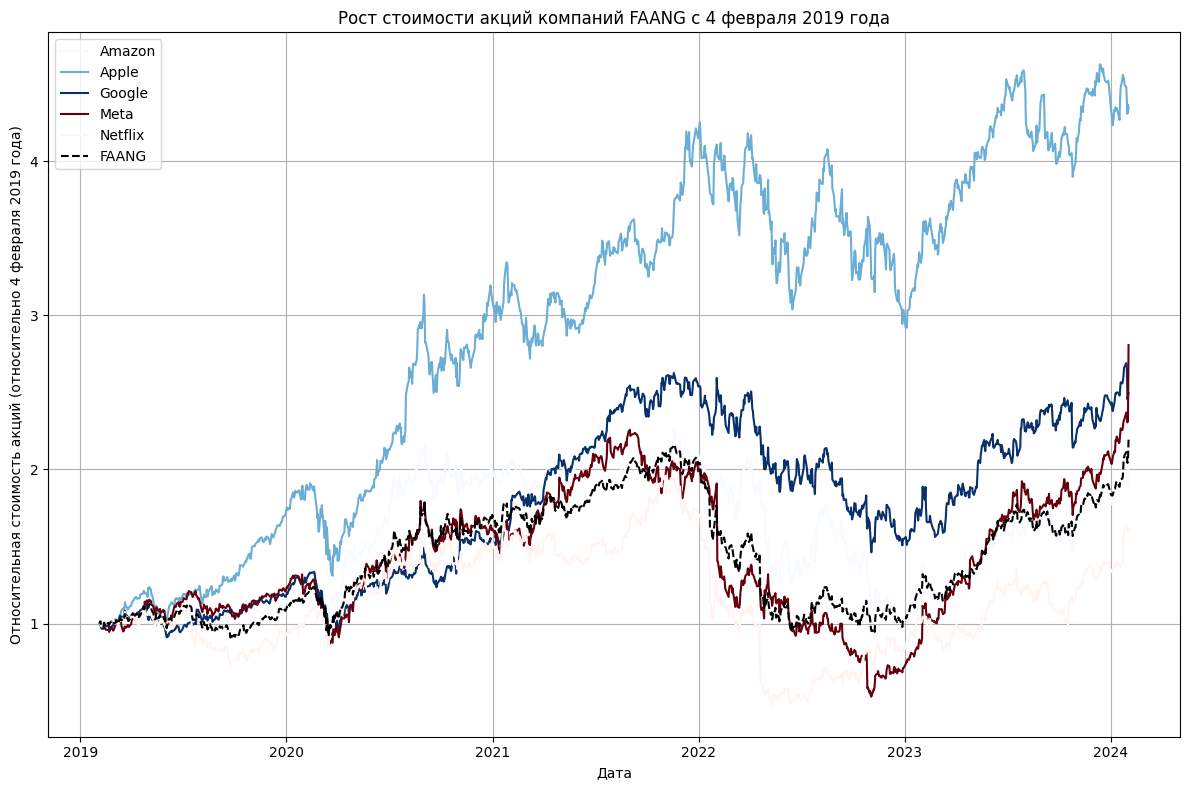

In [17]:
# Столбец с датой
date_column = 'Date'

# Список компаний FAANG
faang_companies = ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']

# Определение базовых цен для каждой компании FAANG (4 февраля 2019 года)
base_prices_faang = stock_market.loc[stock_market[date_column] == '2019-02-04', faang_companies].iloc[0]

# Определение базовой цены для FAANG (4 февраля 2019 года)
base_price_FAANG = stock_market.loc[stock_market[date_column] == '2019-02-04', 'FAANG'].iloc[0]

# Рассчитываем относительные цены для каждой компании FAANG
relative_prices_faang = stock_market[faang_companies] / base_prices_faang

# Рассчитываем относительные цены для FAANG
relative_prices_FAANG = stock_market['FAANG'] / base_price_FAANG

# Списки компаний выше и ниже FAANG
above_faang_companies = []
below_faang_companies = []

# Определяем компании выше и ниже FAANG
for company in faang_companies:
    # Среднее значение по компании
    company_mean = relative_prices_faang[company].mean()
    # Среднее значение по FAANG
    faang_mean = relative_prices_FAANG.mean()
    # Определяем цвет линии в соответствии с условиями: синий, если среднее по компании больше среднего по FAANG, иначе красный
    if company_mean > faang_mean:
        above_faang_companies.append(company)
    else:
        below_faang_companies.append(company)

# Создаем график
plt.figure(figsize=(12, 8))

# Градиент оттенков синего цвета
blue_gradient = np.linspace(0, 1, len(above_faang_companies))

# Градиент оттенков красного цвета
red_gradient = np.linspace(1, 0, len(below_faang_companies))

# Строим графики для компаний выше FAANG
for idx, company in enumerate(above_faang_companies):
    plt.plot(stock_market[date_column], relative_prices_faang[company], label=company[:-6], color=plt.cm.Blues(blue_gradient[idx]))

# Строим графики для компаний ниже FAANG
for idx, company in enumerate(below_faang_companies):
    plt.plot(stock_market[date_column], relative_prices_faang[company], label=company[:-6], color=plt.cm.Reds(red_gradient[idx]))

# Добавляем график для FAANG
plt.plot(stock_market[date_column], relative_prices_FAANG, label='FAANG', linestyle='--', color='black')

# Добавляем легенду и остальные атрибуты
plt.title('Рост стоимости акций компаний FAANG с 4 февраля 2019 года')
plt.xlabel('Дата')
plt.ylabel('Относительная стоимость акций (относительно 4 февраля 2019 года)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Третий вариант сравнить количество дат где компания росла т.е. значения больше 1 и даты где росла FAANG соответсвенно если коунтер будет больше у компании - то она росла активнее FAANG

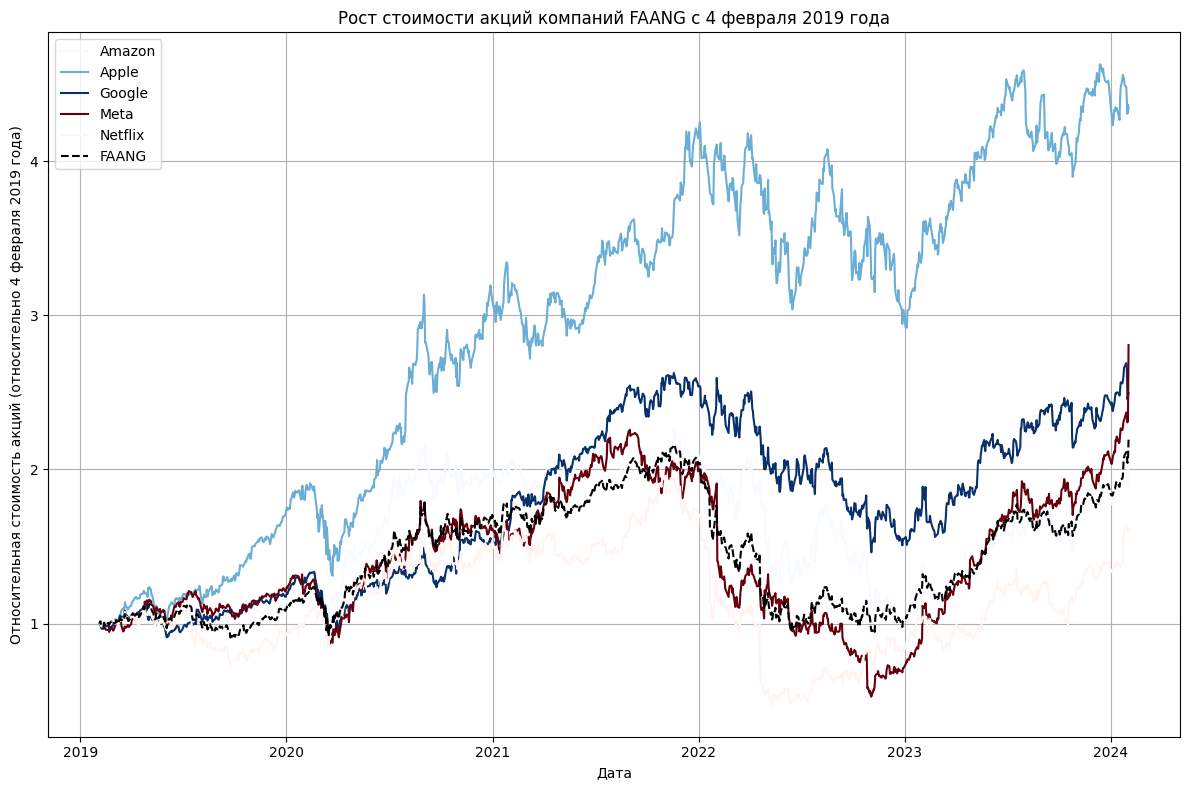

In [18]:
# Столбец с датой
date_column = 'Date'

# Список компаний FAANG
faang_companies = ['Meta_Price', 'Amazon_Price', 'Apple_Price', 'Netflix_Price', 'Google_Price']

# Определение базовых цен для каждой компании FAANG (4 февраля 2019 года)
base_prices_faang = stock_market.loc[stock_market[date_column] == '2019-02-04', faang_companies].iloc[0]

# Определение базовой цены для FAANG (4 февраля 2019 года)
base_price_FAANG = stock_market.loc[stock_market[date_column] == '2019-02-04', 'FAANG'].iloc[0]

# Рассчитываем относительные цены для каждой компании FAANG
relative_prices_faang = stock_market[faang_companies] / base_prices_faang

# Рассчитываем относительные цены для FAANG
relative_prices_FAANG = stock_market['FAANG'] / base_price_FAANG

# Списки компаний выше и ниже FAANG
above_faang_companies = []
below_faang_companies = []

# Определяем компании выше и ниже FAANG
for company in faang_companies:
    # Количество значений больше единицы в компании
    company_above_one_count = (relative_prices_faang[company] > 1).sum()
    # Количество значений больше единицы в FAANG
    faang_above_one_count = (relative_prices_FAANG > 1).sum()
    # Определяем цвет линии в соответствии с условиями: синий, если больше значений больше единицы в компании, иначе красный
    if company_above_one_count > faang_above_one_count:
        above_faang_companies.append(company)
    else:
        below_faang_companies.append(company)

# Создаем график
plt.figure(figsize=(12, 8))

# Градиент оттенков синего цвета
blue_gradient = np.linspace(0, 1, len(above_faang_companies))

# Градиент оттенков красного цвета
red_gradient = np.linspace(1, 0, len(below_faang_companies))

# Строим графики для компаний выше FAANG
for idx, company in enumerate(above_faang_companies):
    plt.plot(stock_market[date_column], relative_prices_faang[company], label=company[:-6], color=plt.cm.Blues(blue_gradient[idx]))

# Строим графики для компаний ниже FAANG
for idx, company in enumerate(below_faang_companies):
    plt.plot(stock_market[date_column], relative_prices_faang[company], label=company[:-6], color=plt.cm.Reds(red_gradient[idx]))

# Добавляем график для FAANG
plt.plot(stock_market[date_column], relative_prices_FAANG, label='FAANG', linestyle='--', color='black')

# Добавляем легенду и остальные атрибуты
plt.title('Рост стоимости акций компаний FAANG с 4 февраля 2019 года')
plt.xlabel('Дата')
plt.ylabel('Относительная стоимость акций (относительно 4 февраля 2019 года)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Задание 3.3 (2 балла)
Что выгоднее — инвестиции в полезные ископаемые или в крупные компании?

Создайте линейный график с двумя линиями. Первая линия отвечает за полезные ископаемые.
Рассчитайте стоимость всех полезных ископаемых в ценах относительно 4 февраля 2019 года. Возьмите это значение за 1, остальные цены получите как отношение к этой цене. Например, если за месяц цены выросли на 10%, то полученное значение равно 1.1.
Подсчитайте среднее по всем полезным ископаемым по дням и добавьте получившиеся значения на график.
Проделайте аналогичную процедуру для всех компаний в датасете. Получившийся средний рост стоимости акций добавьте на график.
На основании полученных результатов ответьте на вопрос: во что лучше инвестировать — в полезные ископаемые или акции компаний?

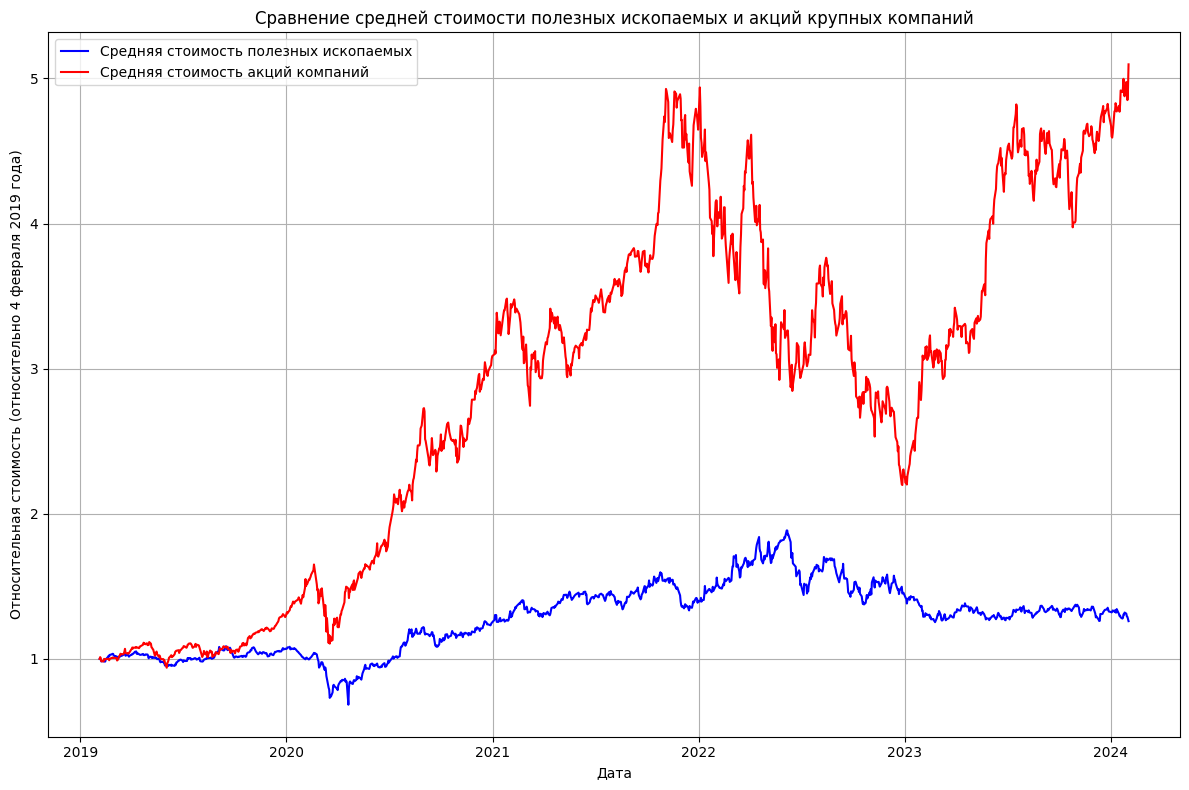

In [19]:
# Выберем только нужные столбцы
columns = ['Date', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Gold_Price',
           'Silver_Price', 'Apple_Price', 'Tesla_Price',
           'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price',
           'Amazon_Price', 'Meta_Price']

# Отфильтруем данные по нужным столбцам
filtered_data = stock_market[columns]

# Установим столбец с датой в качестве индекса
filtered_data.set_index('Date', inplace=True)

# Определим базовые цены для каждого столбца (4 февраля 2019 года)
base_prices = filtered_data.loc['2019-02-04']

# Рассчитаем относительные цены для каждого дня
relative_prices = filtered_data / base_prices

# Рассчитаем средние значения для полезных ископаемых и для компаний
average_commodities = relative_prices[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price',
                                       'Platinum_Price', 'Gold_Price', 'Silver_Price']].mean(axis=1)
average_companies = relative_prices[['Apple_Price', 'Tesla_Price',
                                     'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price',
                                     'Netflix_Price', 'Amazon_Price', 'Meta_Price']].mean(axis=1)

# Создадим график
plt.figure(figsize=(12, 8))

# Построим графики для полезных ископаемых и компаний
plt.plot(relative_prices.index, average_commodities, label='Средняя стоимость полезных ископаемых', color='blue')
plt.plot(relative_prices.index, average_companies, label='Средняя стоимость акций компаний', color='red')

# Добавим легенду и остальные атрибуты
plt.title('Сравнение средней стоимости полезных ископаемых и акций крупных компаний')
plt.xlabel('Дата')
plt.ylabel('Относительная стоимость (относительно 4 февраля 2019 года)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Мы видим что акции компаний растут быстрее и сильнее чем полезных ископаемых, но гораздо хаотичнее. Есть на отрезке с осени 21 года до начала 23 года очень резкие падения. У нас на графике по сути отображается прирост базовой. Это значит что мы наблюдаем потенциальную доходность если вложиться 04.02.2019. При таком подходе конечно выгодрее вкладываться в акции они выросли больше и быстрее чем ископаемые, но лучше посмотреть на прирост цепной - мы увидим колебания - так сказать хаос рынка. Ответ будет такой если есть уверенность и возможность ждать долго или же вы планируете играть на микро переудах - то пожалуства торгуйте на акциях компаний, но если хочется стабильности - то лучше рассмотреть рынок полезных ископаемых. Но еще раз повторюсь если смотреть от точки отсчета то акции компаний выросли в 5 раз - это успех

# Задание 4 (4 балла)
Попробуем использовать разные подходы для реализации одной задачи — визуализации волатильности акций разных компаний.

## Задание 4.1 (2 балла)
С помощью библиотек matplotlib и seaborn создайте поле (plt.subplots()), в котором на графиках для каждой компании будет изображена динамика роста стоимости акций. Отметьте зеленым все компании, стоимость акций которых была в два раза выше на начало 2024 года в сравнении с ценой в начале 2019 года.



Сначала построим с помощью matplotlib

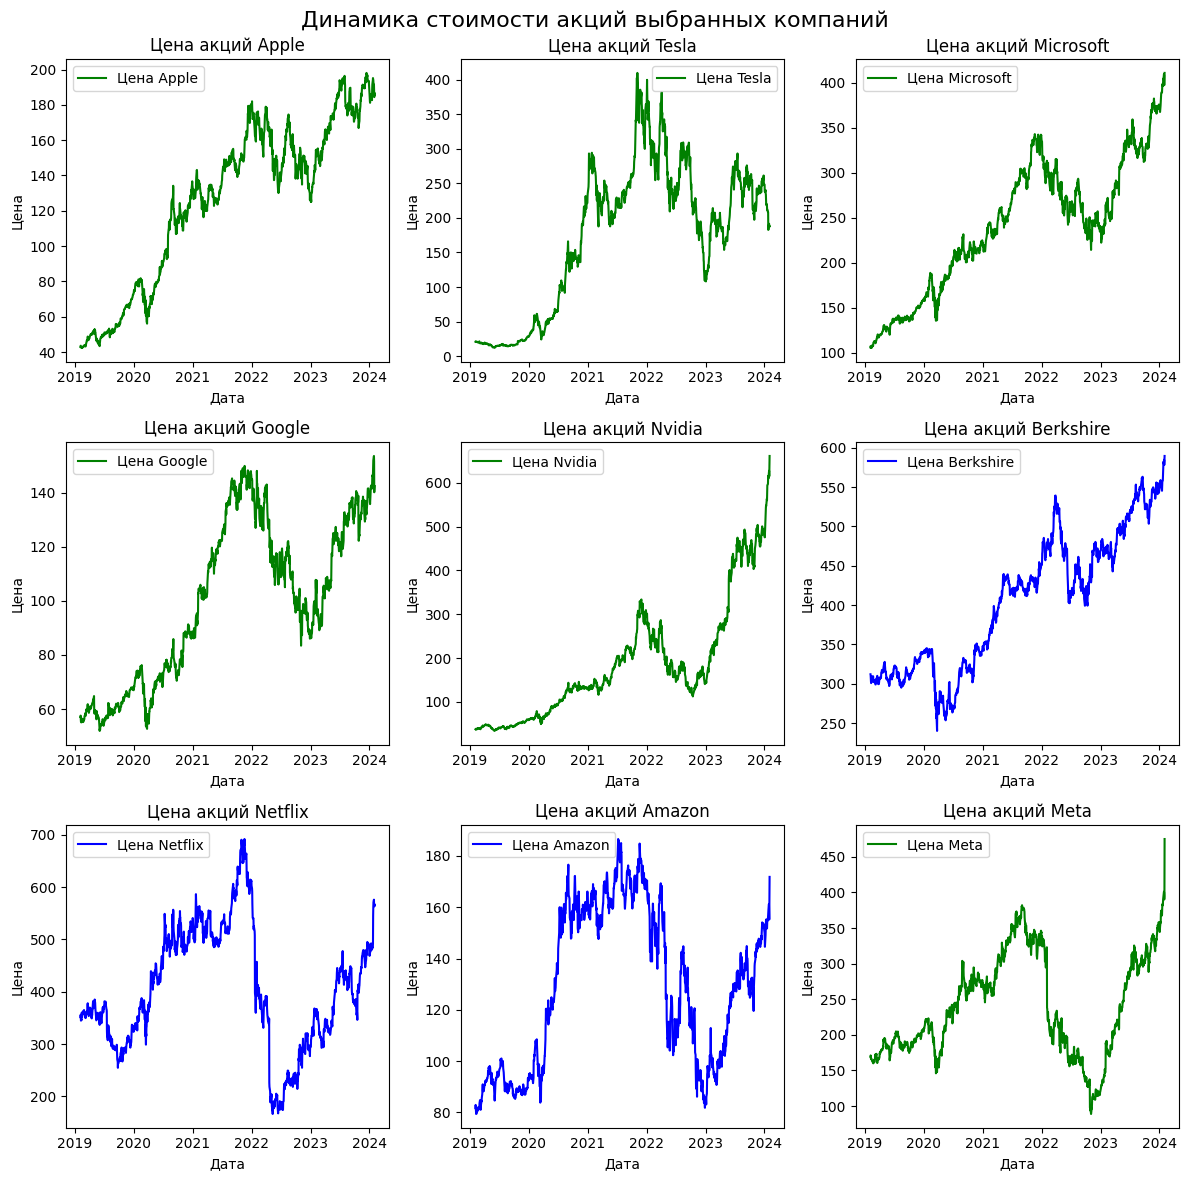

In [20]:
# Получаем список компаний - важно мы удалили S&P_500_Price и Nasdaq_100_Price - потому что это биржевые индесы, а не компании
companies = ['Apple', 'Tesla',
             'Microsoft', 'Google', 'Nvidia', 'Berkshire',
             'Netflix', 'Amazon', 'Meta']

# Создаем поле с графиками этого хватит
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Располагаем графики на полях как учили
for i, company in enumerate(companies):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Фильтруем данные для текущей компании
    company_data = stock_market[['Date', f'{company}_Price']]

    # Устанавливаем дату как индекс
    company_data.set_index('Date', inplace=True)

    # Получаем цены акций в начале 2019 и 2024 года
    price_2019 = company_data.loc[company_data.index.year == 2019, f'{company}_Price'].iloc[0]
    price_2024 = company_data.loc[company_data.index.year == 2024, f'{company}_Price'].iloc[0]

    # Отрисовываем график
    if price_2024 >= 2 * price_2019:
        ax.plot(company_data.index, company_data[f'{company}_Price'], label=f'Цена {company}', color='green')
    else:
        ax.plot(company_data.index, company_data[f'{company}_Price'], label=f'Цена {company}', color='blue')

    ax.set_title(f'Цена акций {company}')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')

    ax.legend()

# Добавляем общий заголовок
fig.suptitle('Динамика стоимости акций выбранных компаний', fontsize=16)

# Располагаем графики компактно
plt.tight_layout()
plt.show()


А теперь с помощью seaborn

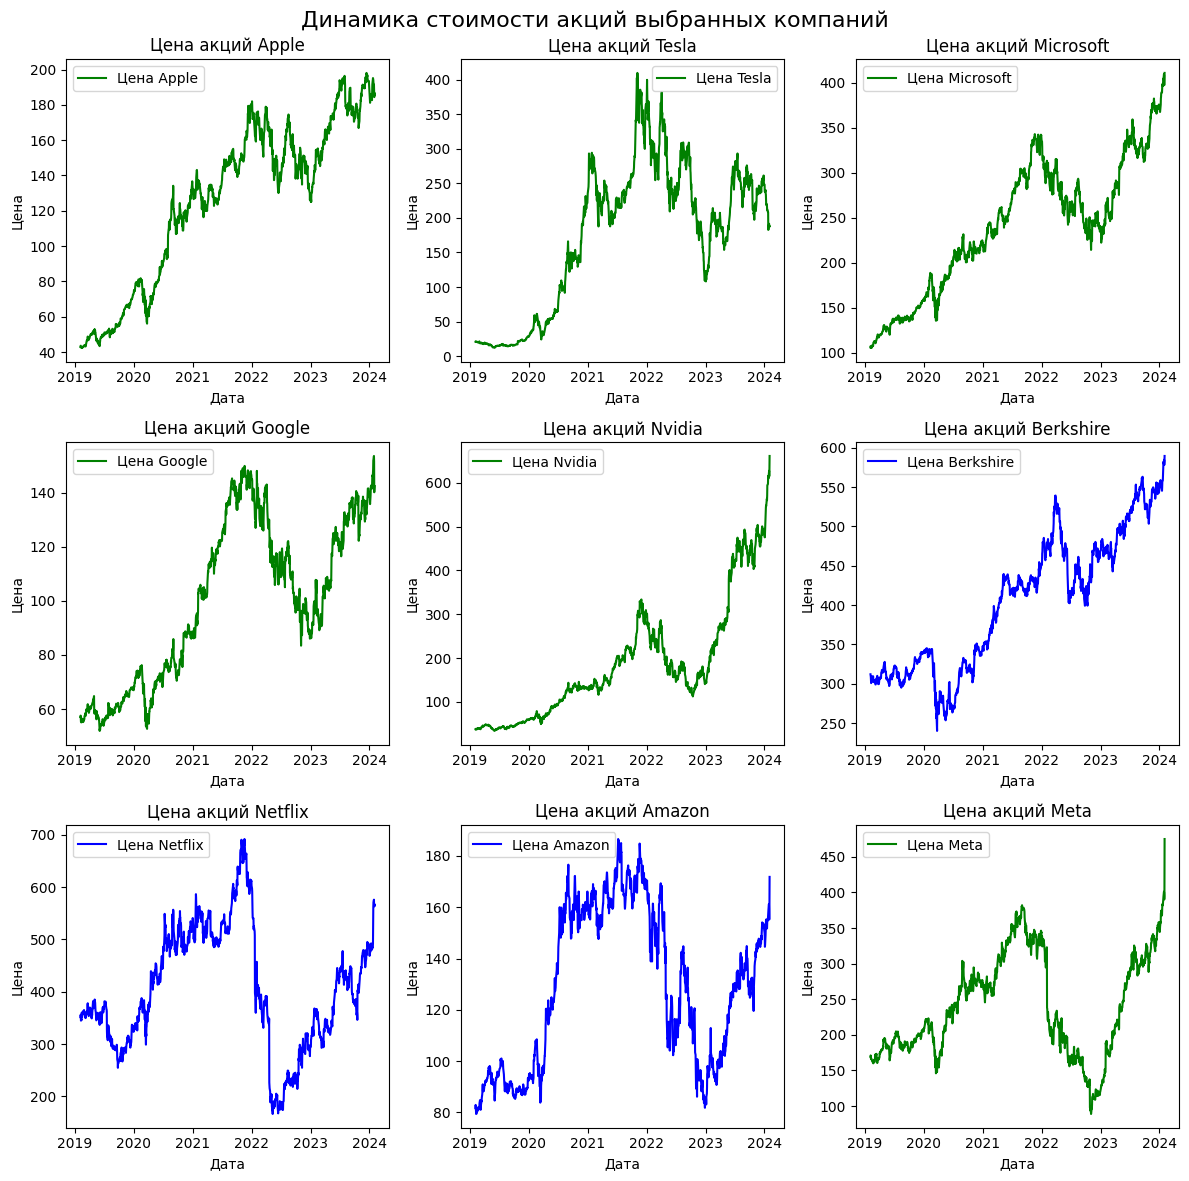

In [21]:
# Получаем список компаний
companies = ['Apple', 'Tesla',
             'Microsoft', 'Google', 'Nvidia', 'Berkshire',
             'Netflix', 'Amazon', 'Meta']

# Создаем поле с графиками
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Располагаем графики на полях
for i, company in enumerate(companies):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Фильтруем данные для текущей компании
    company_data = stock_market[['Date', f'{company}_Price']]

    # Устанавливаем дату как индекс
    company_data.set_index('Date', inplace=True)

    # Получаем цены акций в начале 2019 и 2024 года
    price_2019 = company_data.loc[company_data.index.year == 2019, f'{company}_Price'].iloc[0]
    price_2024 = company_data.loc[company_data.index.year == 2024, f'{company}_Price'].iloc[0]

    # Отрисовываем график
    if price_2024 >= 2 * price_2019:
        sns.lineplot(data=company_data, x=company_data.index, y=f'{company}_Price', ax=ax, label=f'Цена {company}', color='green')
    else:
        sns.lineplot(data=company_data, x=company_data.index, y=f'{company}_Price', ax=ax, label=f'Цена {company}', color='blue')

    ax.set_title(f'Цена акций {company}')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')

    ax.legend()

# Добавляем общий заголовок
fig.suptitle('Динамика стоимости акций выбранных компаний', fontsize=16)

# Располагаем графики компактно
plt.tight_layout()
plt.show()


## Задание 4.2 (2 балла)
С помощью библиотеки plotly создайте lineplot, в котором будет изображена динамика акций компаний за период с 2019 по 2024 гг. Добавьте на график кнопки для каждой компании, нажав на которые можно переключиться между визуализациями динамики изменения стоимости акций для разных компаний. Добавьте название и подписи к осям каждого графика.

In [22]:
# Получаем список компаний
companies = ['Apple', 'Tesla',
             'Microsoft', 'Google', 'Nvidia', 'Berkshire',
             'Netflix', 'Amazon', 'Meta']

# Создаем фигуру Plotly
fig = go.Figure()

# Добавляем графики для каждой компании
for company in companies:
    # Фильтруем данные для текущей компании
    company_data = stock_market[['Date', f'{company}_Price']]

    # Устанавливаем дату как индекс
    company_data.set_index('Date', inplace=True)

    # Добавляем линейный график для текущей компании
    fig.add_trace(go.Scatter(x=company_data.index, y=company_data[f'{company}_Price'], mode='lines', name=company))

# Добавляем интерактивные кнопки для переключения между компаниями и сброса
buttons = []

# Добавляем кнопку "All Companies"
buttons.append(dict(method='update',
                    label='Все компании',
                    args=[{'visible': [True] * len(fig.data)},
                          {'title': 'Динамика стоимости акций всех компаний (2019-2024 гг.)',
                           'xaxis': {'title': 'Дата'},
                           'yaxis': {'title': 'Цена акций'}}]))

# Добавляем кнопки для отдельных компаний
for company in companies:
    buttons.append(dict(method='update',
                        label=company,
                        args=[{'visible': [company == trace.name for trace in fig.data]},
                              {'title': f'Динамика стоимости акций {company}',
                               'xaxis': {'title': 'Дата'},
                               'yaxis': {'title': 'Цена акций'}}]))

fig.update_layout(updatemenus=[{'buttons': buttons,
                                'direction': 'down',
                                'showactive': True,
                                'x': 0.5,
                                'xanchor': 'center',
                                'y': 1.1,
                                'yanchor': 'top',
                                'active': 0  # Sets "All Companies" button as active initially
                                }])

# Устанавливаем общий заголовок для графика
fig.update_layout(title_text='Динамика стоимости акций компаний (2019-2024 гг.)')

# Отображаем график
fig.show()


# Задание 5 (2 балла)
Напишите функцию, которая будет принимать на вход название компании, с помощью этого названия строить scatter plot с зависимостью цены (Price) акций от оборота (Volume) компании.
На каждый scatter plot добавьте линию линейной регрессии, которая будет показывать получившуюся зависимость. Получившуюся линию покрасьте в красный цвет.
Также на scatter plot добавьте текст с получившимся уравнением (вида  ).
Постройте поле (plt.subplots()), в котором будут изображены диаграммы рассеяния для всех компаний, присутствующих в датасете (используйте метод .pipe()). Каждая диаграмма рассеяния должна представлять собой зависимость цен на акции от выручки, иметь линию регрессии, а также текст с регрессионным уравнением для конкретной компании.

In [23]:
# Итак вот базовая функция
def plot_stock_price_vs_volume(data, company_name):
    # Filter data for the specified company
    price_column = f'{company_name}_Price'
    volume_column = f'{company_name}_Vol.'
    company_data = data[[price_column, volume_column]]

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(company_data[volume_column], company_data[price_column], alpha=0.5)

    # Add labels and title
    plt.title(f'Stock Price vs. Volume for {company_name}')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


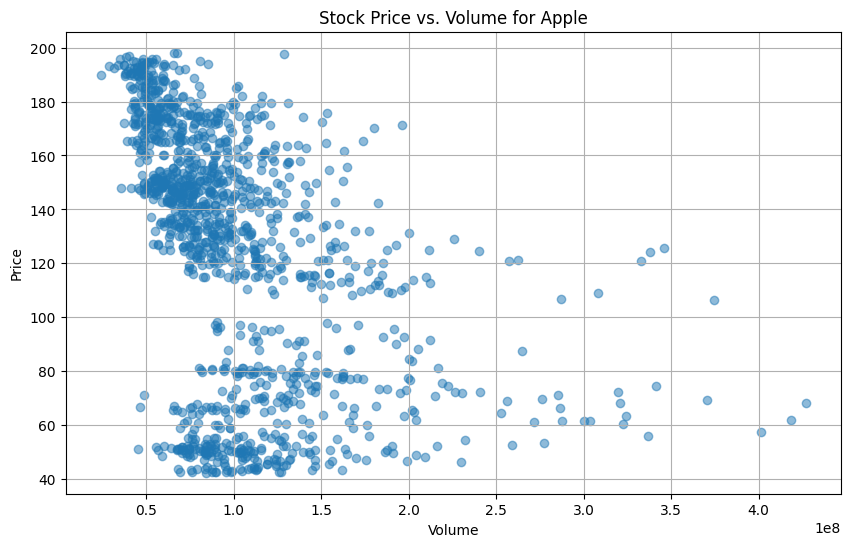

In [24]:
# посмотрим как она работает
plot_stock_price_vs_volume(stock_market, 'Apple')


Теперь добавим линию регрессии, нам потребуется дополнительная библиотека

In [25]:
from scipy.stats import linregress

In [26]:
def plot_stock_price_vs_volume(data, company_name):
    # Filter data for the specified company
    price_column = f'{company_name}_Price'
    volume_column = f'{company_name}_Vol.'
    company_data = data[[price_column, volume_column]]

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=volume_column, y=price_column, data=company_data)

    # Add linear regression line
    slope, intercept, _, _, _ = linregress(company_data[volume_column], company_data[price_column])
    plt.plot(company_data[volume_column], slope * company_data[volume_column] + intercept, color='red', label='Regression Line')

    # Add equation of the regression line
    plt.text(0.1, 0.9, f'y = {slope:.2f}x + {intercept:.2f}', transform=plt.gca().transAxes, color='red')

    # Add labels and title
    plt.title(f'Stock Price vs. Volume for {company_name}')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

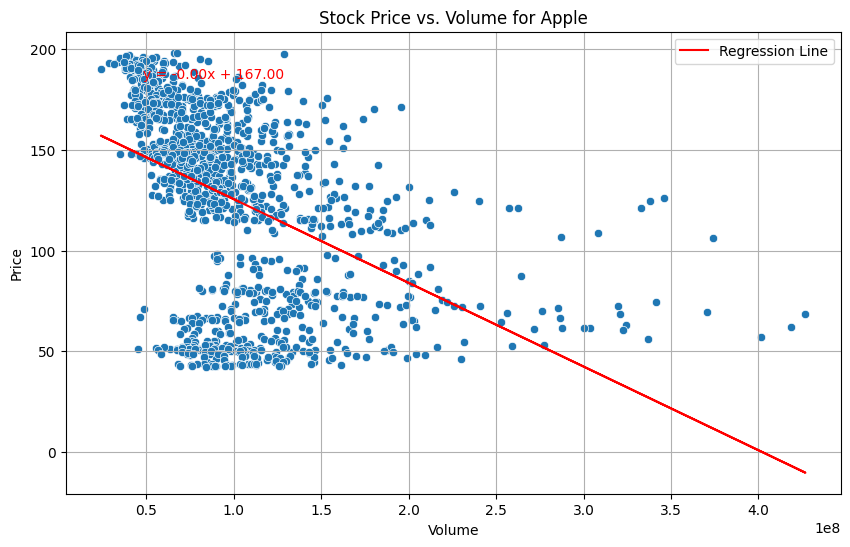

In [27]:
plot_stock_price_vs_volume(stock_market, 'Apple')

Вроде работает но не очень красиво, но мы помним что seaborn славится своими красивыми и простыми графиками и там есть готовое решение для нашей задачи

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



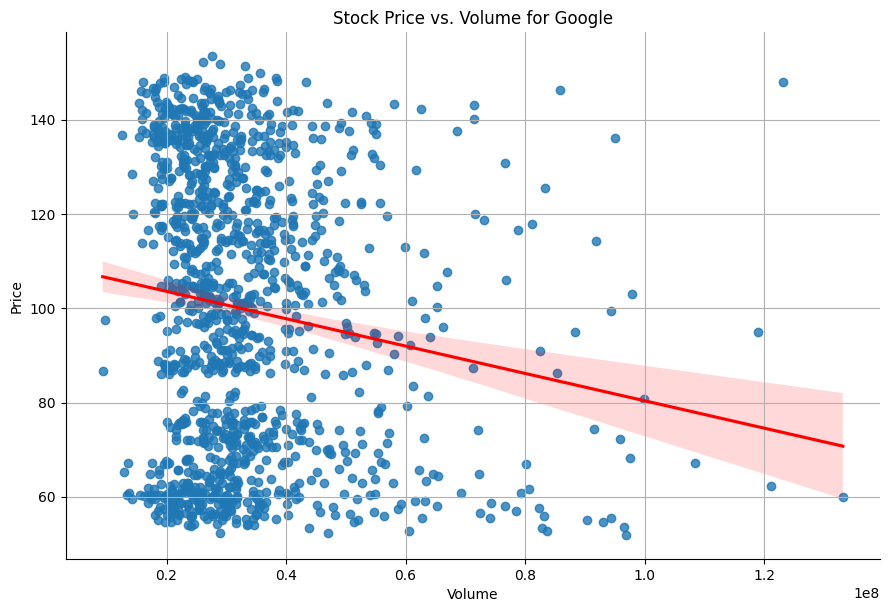

In [28]:
def plot_stock_price_vs_volume(data, company_name):
    # Filter data for the specified company
    price_column = f'{company_name}_Price'
    volume_column = f'{company_name}_Vol.'
    company_data = data[[price_column, volume_column]]

    # Plot scatter plot with regression line
    sns.lmplot(x=volume_column, y=price_column, data=company_data, height=6, aspect=1.5, line_kws={'color': 'red'})

    # Add labels and title
    plt.title(f'Stock Price vs. Volume for {company_name}')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

# Example usage:
plot_stock_price_vs_volume(stock_market, 'Google')


Осталось добавить уравнение регрессии

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



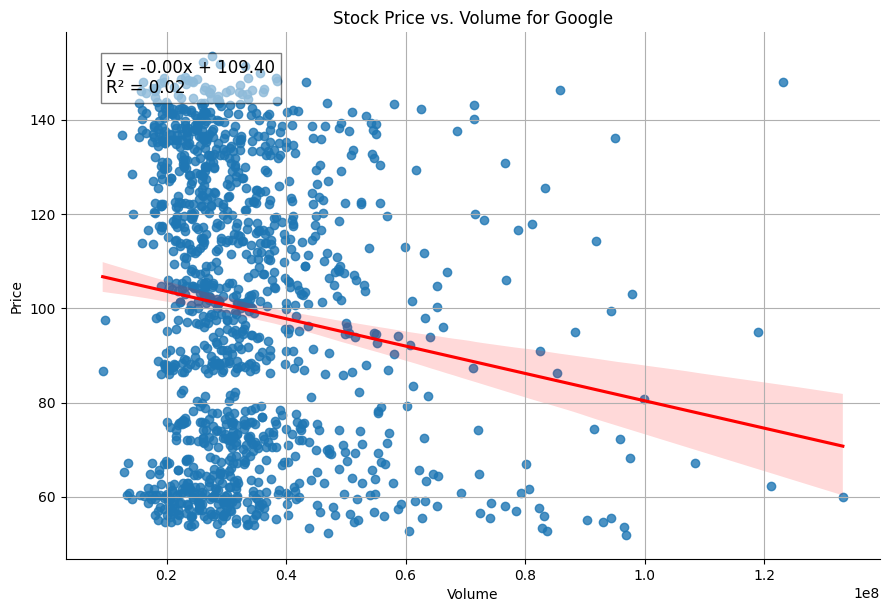

In [29]:
def plot_stock_price_vs_volume(data, company_name):
    # Filter data for the specified company
    price_column = f'{company_name}_Price'
    volume_column = f'{company_name}_Vol.'
    company_data = data[[price_column, volume_column]]

    # Plot scatter plot with regression line
    sns.lmplot(x=volume_column, y=price_column, data=company_data, height=6, aspect=1.5, line_kws={'color': 'red'})

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(company_data[volume_column], company_data[price_column])

    # Add equation of the regression line
    equation = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Add labels and title
    plt.title(f'Stock Price vs. Volume for {company_name}')
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

# Пример использования:
plot_stock_price_vs_volume(stock_market, 'Google')


Теперь можно писать код финального задания

In [30]:
# Функция для построения диаграммы рассеяния с линией регрессии и уравнением регрессии
def plot_stock_price_vs_volume(data, company_name, ax):
    # Фильтруем данные для выбранной компании
    price_column = f'{company_name}_Price'
    volume_column = f'{company_name}_Vol.'
    company_data = data[[price_column, volume_column]]

    # Строим scatter plot с линией линейной регрессии
    sns.regplot(x=volume_column, y=price_column, data=company_data, line_kws={'color': 'red'}, ax=ax)

    # Вычисляем параметры линейной регрессии
    slope, intercept, r_value, p_value, std_err = linregress(company_data[volume_column], company_data[price_column])

    # Добавляем уравнение линейной регрессии на график
    equation = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}'
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Добавляем подписи осей и заголовок
    ax.set_title(f'Stock Price vs. Volume for {company_name}')
    ax.set_xlabel('Volume')
    ax.set_ylabel('Price')
    ax.grid(True)

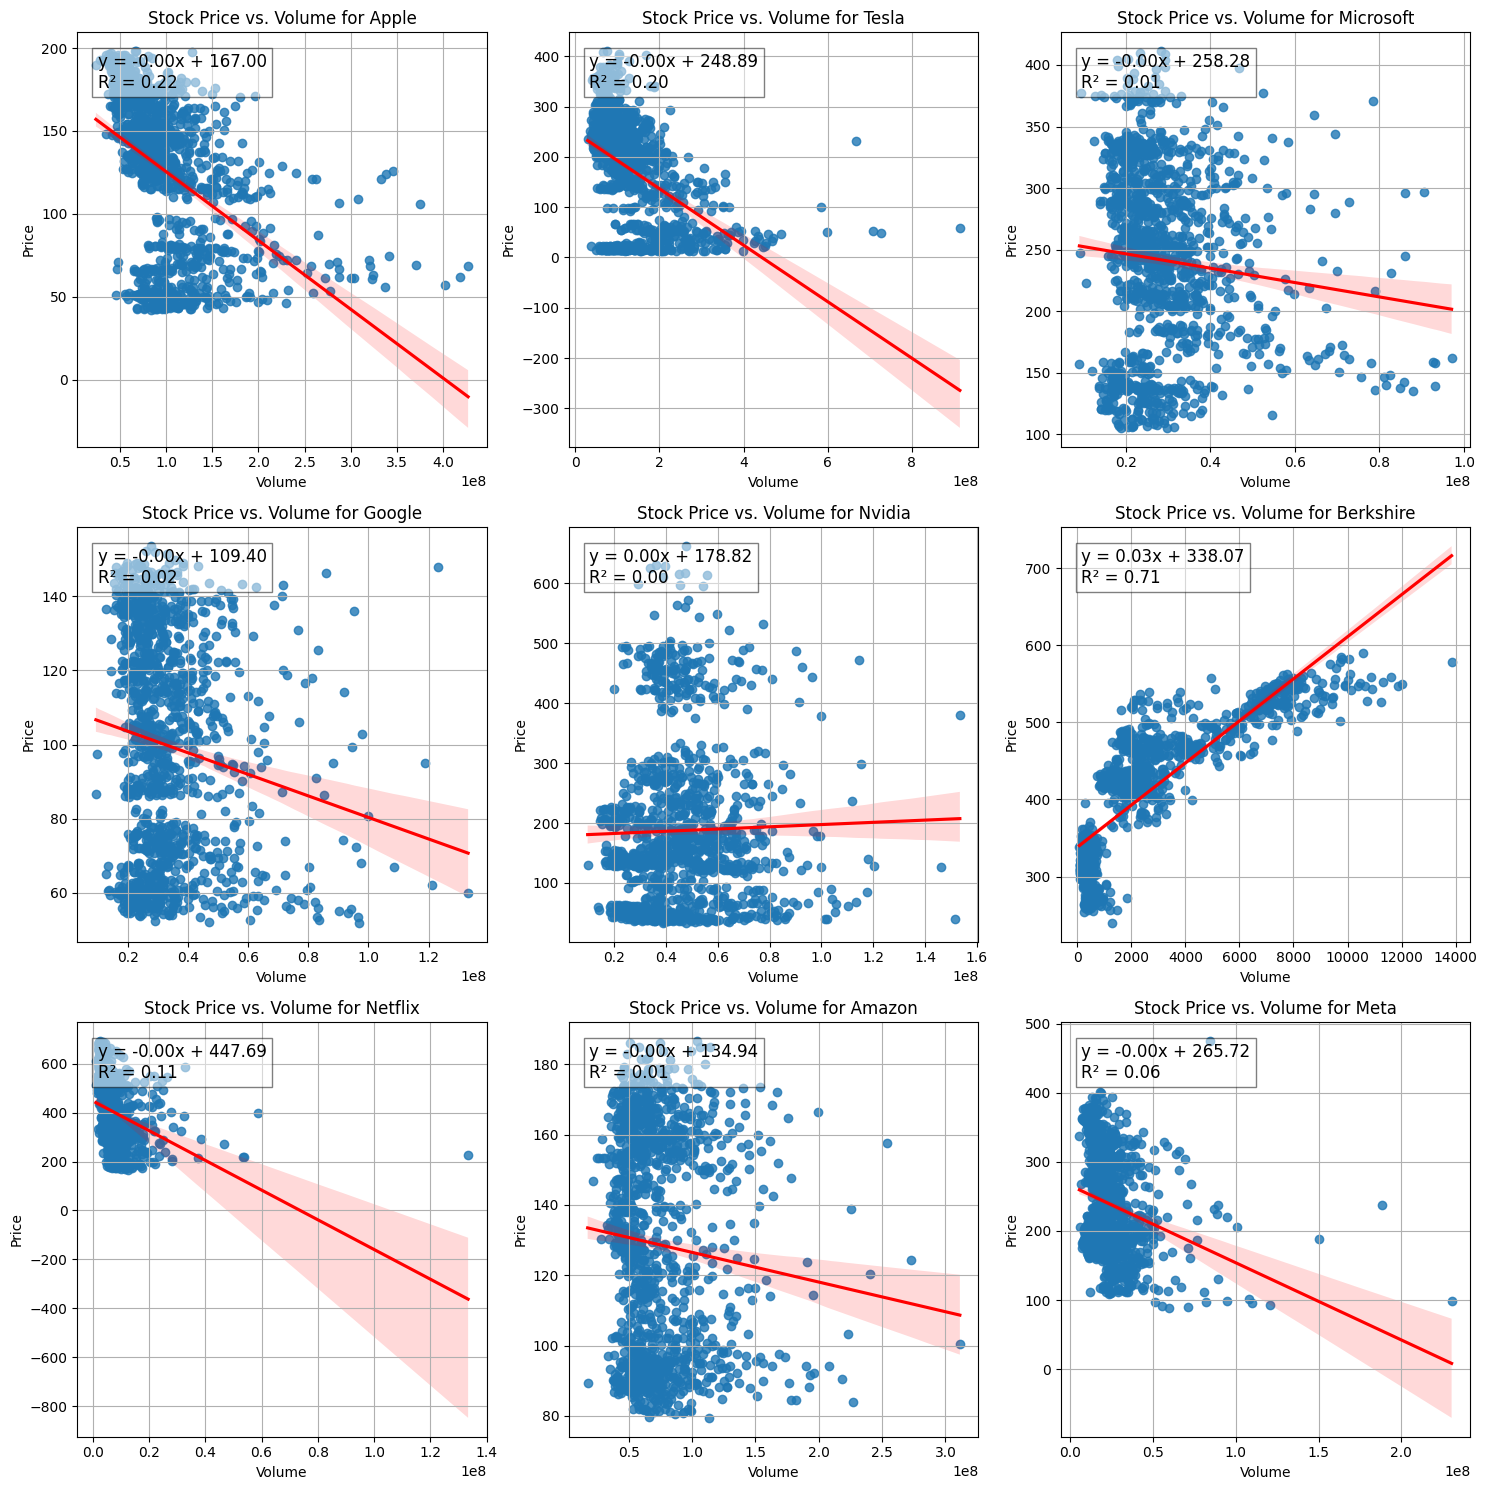

In [31]:
# Получаем список компаний
companies = ['Apple', 'Tesla',
             'Microsoft', 'Google', 'Nvidia', 'Berkshire',
             'Netflix', 'Amazon', 'Meta']

# Создаем поле с сабплотами для каждой компании
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Используем функцию enumerate() для получения индекса и сабплота внутри цикла
for i, company in enumerate(companies):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    plot_stock_price_vs_volume(stock_market, company, ax)

plt.tight_layout()
plt.show()

Получилась красота!!! А какие выводы? а такие что четкая зависимость стоимости акцйи от обема продаж есть только у компании Berkshire. Визульано об этом говорит гарфик, а числом показатель R^2 (апроксимация - на сколько регрессиия хорошо объясняет зависимость, он равет 0.7 это не много но уже неплохо)